In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/ung thư.csv')

In [3]:
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [4]:
data.info()
data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


569

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

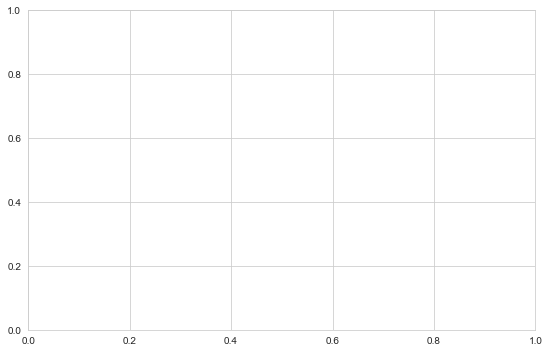

In [10]:
# Hist sub plots
# Set up the figure and axis
plt.figure(figsize=(20, 20))
sns.set_style("whitegrid")

# Plot histograms for each feature
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], color='skyblue', kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [ ]:
class GaussianNaiveBayes:
    def __init__(self):
        self.means = None
        self.stds = None
        self.class_priors = None

    def fit(self, X, y):
        # Number of instances and number of classes
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize mean, std, and priors
        self.means = np.zeros((n_classes, n_features), dtype=np.float64)
        self.stds = np.zeros((n_classes, n_features), dtype=np.float64)
        self.class_priors = np.zeros(n_classes, dtype=np.float64)

        # Calculate the mean, std and prior for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx, :] = X_c.mean(axis=0)
            self.stds[idx, :] = X_c.std(axis=0)
            self.class_priors[idx] = X_c.shape[0] / n_samples

    def predict(self, X):
        y_pred = [self._predict(sample) for sample in X]
        return np.array(y_pred)

    def _predict(self, sample):
        # Calculate the posterior probability for each class
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.class_priors[idx])
            class_likelihood = np.sum(np.log(self._pdf(idx, sample)))
            posterior = prior + class_likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        # Gaussian Probability Density Function
        mean = self.means[class_idx]
        std = self.stds[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * std ** 2))
        denominator = np.sqrt(2 * np.pi * std ** 2)
        return numerator / denominator



In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Gaussian Naive Bayes model
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
accuracy


0.9473684210526315